# Introduction

***

<p style="font-size:18px;"> This case study will focus on the use of Cyclistic city bikes between members and casual users in Chicago.
Cyclistic is a bike-share program that features more than 5,800 bicycles and 600
docking stations. Cyclistic sets itself apart by also offering reclining bikes, hand
tricycles, and cargo bikes, making bike-share more inclusive to people with disabilities
and riders who can’t use a standard two-wheeled bike. The majority of riders opt for
traditional bikes; about 8% of riders use the assistive options. Cyclistic users are more
likely to ride for leisure, but about 30% use the bikes to commute to work each day.
   
<p style="font-size:18px;"><strong>Business Problem</strong>
<p style="font-size:18px;"> Lily Moreno is the director of marketing for Cyclistic. Moreno is responsible for
the development of campaigns and initiatives to promote the bike-share program. Moreno has set a clear goal: Design marketing strategies aimed at converting casual riders into annual members. In order to do that,the team needs to better understand how annual members and casual riders differ, why casual riders would buy a membership, and how digital media could affect their marketing tactics. Moreno and her team are interested in analyzing the Cyclistic historical bike trip data to identify trend. Moreno wants to answer the following question:
<ul style="font-size:18px;">
<li><strong>How do annual members and casual riders use Cyclistic bikes differently?</strong></li></ul> 

    
<p style="font-size:18px;"> The goal of this analysis is to answer Moreno's question and inform the wider business of how members and causal users use the bike share program diffrently. Additonally recomendations will be made on how casual users could be converted into members.
    
<p style="font-size:18px;"> This analysis will take a step by step aproach detailing all the steps i have taken to complete this analysis.

##### **Importing libarys**

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pylab as plt
import plotly.express as px
import missingno as msno
import folium
plt.style.use("ggplot") 

print("Libarys imported")

Libarys imported


##### **Importing data**

In [2]:
# Set the directory you want to start from
rootDir = '/kaggle/input/chicago-bike-data'

dataframes = []  # List to store all dataframes

# Loop through all directories and subdirectories
for dirpath, _, filenames in os.walk(rootDir):
    for fname in filenames:
        if fname.endswith('.csv'):  # Check if file is a CSV
            filepath = os.path.join(dirpath, fname)
            df = pd.read_csv(filepath)
            dataframes.append(df)

# Concatenate all dataframes into one
df = pd.concat(dataframes, ignore_index=True)

print("Data imported")

Data imported



# **Data Exploration**
    
***
    
<p style="font-size:18px;">Now that the data has been imported it is good to understand the data, the diffrent types of data and format of the data. the following section visualizes a small sample of the data, identifys the size of the data and the types of data which are included in the data frame.


In [3]:
# Visually see the top 5 rows of the data
df.head(5)

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,6842AA605EE9FBB3,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clark St & Armitage Ave,13146,Larrabee St & Webster Ave,13193,41.918413,-87.636451,41.921822,-87.644140,member
1,F984267A75B99A8C,electric_bike,2023-03-04 14:07:06,2023-03-04 14:15:31,Public Rack - Kedzie Ave & Argyle St,491,NaN,NaN,41.970000,-87.710000,41.950000,-87.710000,member
2,FF7CF57CFE026D02,classic_bike,2023-03-31 12:28:09,2023-03-31 12:38:47,Orleans St & Chestnut St (NEXT Apts),620,Clark St & Randolph St,TA1305000030,41.898203,-87.637536,41.884576,-87.631890,member
3,6B61B916032CB6D6,classic_bike,2023-03-22 14:09:08,2023-03-22 14:24:51,Desplaines St & Kinzie St,TA1306000003,Sheffield Ave & Kingsbury St,13154,41.888716,-87.644448,41.910522,-87.653106,member
4,E55E61A5F1260040,electric_bike,2023-03-09 07:15:00,2023-03-09 07:26:00,Walsh Park,18067,Sangamon St & Lake St,TA1306000015,41.914480,-87.668013,41.885779,-87.651025,member


In [4]:
#Show data types and size of the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707168 entries, 0 to 5707167
Data columns (total 13 columns):
 #   Column              Dtype  
---  ------              -----  
 0   ride_id             object 
 1   rideable_type       object 
 2   started_at          object 
 3   ended_at            object 
 4   start_station_name  object 
 5   start_station_id    object 
 6   end_station_name    object 
 7   end_station_id      object 
 8   start_lat           float64
 9   start_lng           float64
 10  end_lat             float64
 11  end_lng             float64
 12  member_casual       object 
dtypes: float64(4), object(9)
memory usage: 566.0+ MB



# **Data Cleaning** 
    
***
    
    
<p style="font-size:18px;">The following section I will be cleaning the data which ensures that the data is in the correct format as well as removing or fixing any missing values.</p>   

<p style="font-size:18px;">The first error I noticed during data exploration is that the "started_at" and "ended_at" columns had a data type of object instead of the correct datetime data type. By converting these columns to datetime this would allow me to preform analysis of the dates to determine if there are any patterns in the day of the week, month of the year or hour of the day users are using the bike share service. The below code converts the data from object to datetime data type.

In [5]:
#Convert start and end times to a datetime data type.
df["started_at"]= pd.to_datetime(df["started_at"])
df["ended_at"]= pd.to_datetime(df["ended_at"])
df.dtypes

ride_id                       object
rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

<p style="font-size:18px;">Next I needed to check if there were any null values in the data and either correct, fill or remove any missing values. Below I create a dataframe which summarizes the number of null values by column and the percentage of null values per column. This provides me with an understanding of how complete the data is and the columns which require attention.

In [6]:
# Calculate number of null values + percentage
non_null_values = df.notnull().sum()
null_values = df.isnull().sum()
total_values = len(df)
null_percentage = round((df.isnull().mean()*100), 2)
non_null_percentage = round((df.notnull().mean()*100), 2)

# Create a summary DataFrame
summary_df = pd.concat([non_null_values, null_values, null_percentage], axis=1)
summary_df.columns = ['Non-Null Values', 'Null Values', 'Null Percentage']

# Display summary table
summary_df

,Non-Null Values,Null Values,Null Percentage
ride_id,5707168,0,0.00
rideable_type,5707168,0,0.00
started_at,5707168,0,0.00
ended_at,5707168,0,0.00
start_station_name,4841063,866105,15.18
start_station_id,4841063,866105,15.18
end_station_name,4786644,920524,16.13
end_station_id,4786644,920524,16.13
start_lat,5707168,0,0.00
start_lng,5707168,0,0.00


<p style="font-size:18px;"> It appears there is a significant number of values missing from the following columns:
<ul style="font-size:18px;">
<li>start_station_name</li> 
<li>start_station_id</li> 
<li>end_station_name</li> 
<li>end_station_id</li> 
</ul>

<p style="font-size:18px;"> Additionally a minor percentage of values missing from:
<ul style="font-size:18px;">
<li>end_lat</li>
<li>end_lng</li>
</ul>

<p style="font-size:18px;"> My first instinct was to check to ensure that there were no full duplicates in the data. This is where the data in a row is exactly the same in all columns. 


In [7]:
#Checking for any full duplicates
print("Number of full duplicated rows:")
print(df.duplicated().sum())

#Checking for any rows with the same ride id
print("Number of duplicated 'ride_id' values:")
print(df.duplicated(subset=["ride_id"]).sum())

Number of full duplicated rows:
0
Number of duplicated 'ride_id' values:
0


<p style="font-size:18px;"> After this returned zero duplicates I wanted to ensure that each value in ride_id was unique and contained no duplicates. Since both checks resulted in zero duplicates it lead me to belive that there were no duplicates contained in the data. 
    
<p style="font-size:18px;"> To make the dataframe more manageable and concise I decided that the start_startion_id and end_station_id added no additional value which could benifit my analysis as such these columns were dropped from the dataframe.

In [8]:
#Function to drop necessary columns
def drop_columns(df, cols_to_drop):
    df = df.drop(cols_to_drop, axis=1)
    return df

# Drop 'start_station_id' and 'end_station_id'
cols_to_drop = ['start_station_id', 'end_station_id']
df = drop_columns(df, cols_to_drop)
df.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
0,6842AA605EE9FBB3,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clark St & Armitage Ave,Larrabee St & Webster Ave,41.918413,-87.636451,41.921822,-87.64414,member


<p style="font-size:18px;"> I decided to visualized the missing data to help me understand how many values needed to be filled or ammended.

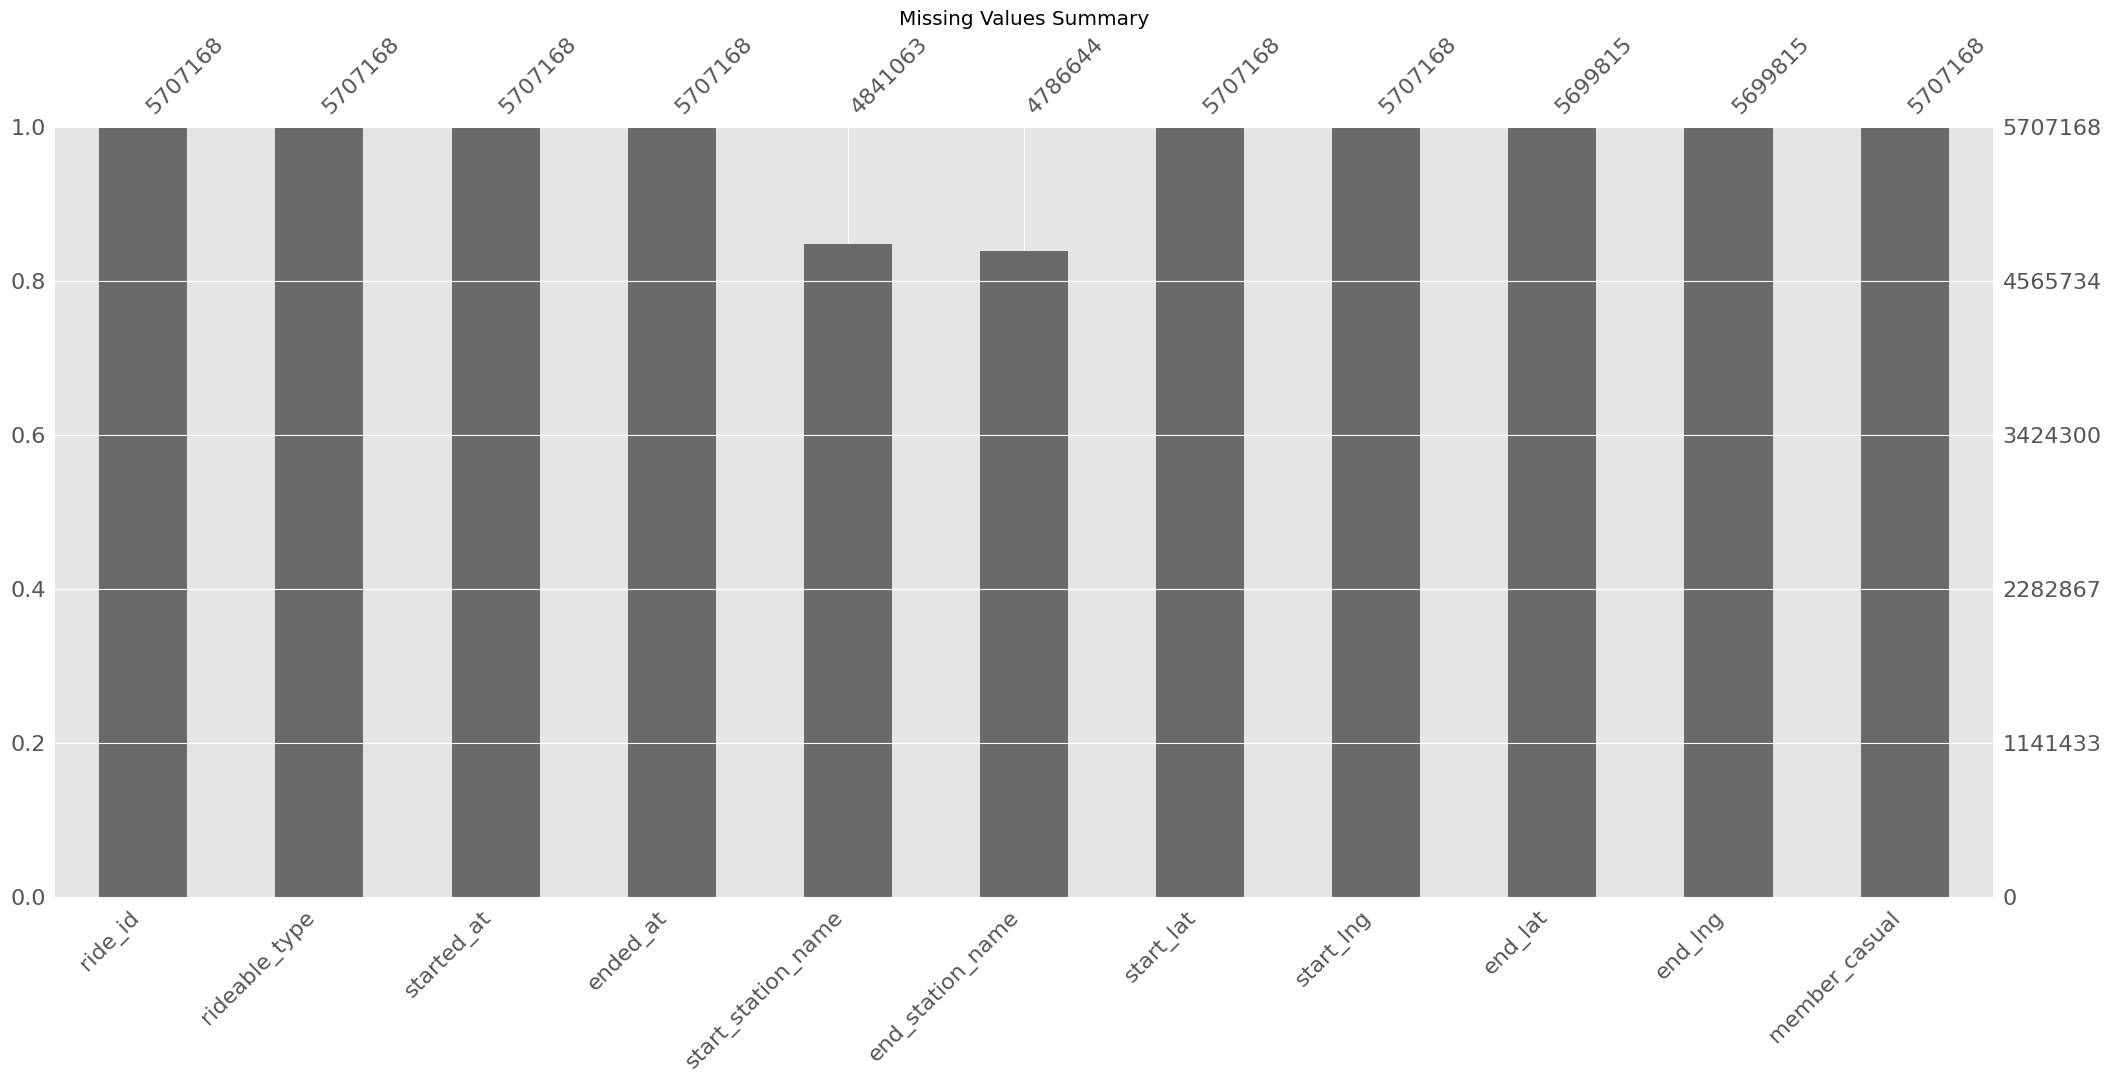

In [9]:
#Ploting missing rows
msno.bar(df)
plt.title('Missing Values Summary')
plt.show()

<p style="font-size:18px;"> I decided to take all the longitude and latitude values from the dataframe where the "start_station_name" or "end_station_name" is null to determine how many stations had missing names based on their longitude and latitude location. 
    
<p style="font-size:18px;"> I concatenated the data to create one master list which contained all the longitude and latitude values for all stations which were missing a name.
    
<p style="font-size:18px;"> To ensure I only had unique values I removed any duplicates. Removed any null values and reset the index of the dataframe to keep the data organized in a structured manner.
    
<p style="font-size:18px;"> The length of this dataframe was printed to identify how many stations were missing names. 

In [10]:
# Retrieve the series for start_lat and start_lng where end_lat and end_lng are null
start_lat_lng = df[df['start_station_name'].isnull()][['start_lat', 'start_lng']]
end_lat_lng = df[df['end_station_name'].isnull()][['end_lat', 'end_lng']]

# Concatenate Data vertically
combined_lat = pd.concat([start_lat_lng['start_lat'], end_lat_lng['end_lat']], ignore_index=True)
combined_lng = pd.concat([start_lat_lng['start_lng'], end_lat_lng['end_lng']], ignore_index=True)

# Combine the two series into a single DataFrame
combined_lat_lng = pd.DataFrame({'latitude': combined_lat, 'longitude': combined_lng})

# Remove duplicate values
combined_lat_lng = combined_lat_lng.drop_duplicates()
combined_lat_lng = combined_lat_lng.dropna()
combined_lat_lng = combined_lat_lng.reset_index(drop=True)

print("Number of Unique values in the combined series:")
print(len(combined_lat_lng))
combined_lat_lng.head(3)

Number of Unique values in the combined series:
890


,latitude,longitude
0,41.94,-87.67
1,41.88,-87.65
2,41.89,-87.63


<p style="font-size:18px;"> There is a large number of stations which were missing names. In total there are 890 missing station names which is aproximatley 16% of the entire data missing. 
    
<p style="font-size:18px;"> Although there is a large number of stations which had no name it was important to quantify how many times users had used these stations. I created 3 additonal columns the first of which counts the number of times the the longitude and latitude of a station matches a row in the dataframe columns "start_lat" and "start_lng". The second column counts the matches in the "end_lat" and "end_lng" columns. Finally the third column totals both of the previous columns to identify the total times each station is either started at or ended at in the data. This data would give me an indication of how popular and used each station is.  
    
<p style="font-size:18px;"> To ensure each station was accounted for I wanted to name each and every station with a unique name such that I would have a greater control over the data and allow for more detailed analysis if required.

In [11]:
# Initialize 'count' column with zeros
combined_lat_lng['count_start'] = 0
combined_lat_lng['count_end'] = 0

# Merge based on matching start_lat and latitude
merged_df_start = pd.merge(df, combined_lat_lng, left_on=['start_lat', 'start_lng'], right_on=['latitude', 'longitude'], how='inner')

# Merge based on matching end_lat and latitude
merged_df_end = pd.merge(df, combined_lat_lng, left_on=['end_lat', 'end_lng'], right_on=['latitude', 'longitude'], how='inner')

# Count occurrences for start locations
count_series_start = merged_df_start.groupby(['latitude', 'longitude']).size()
for index, count in count_series_start.items():
    combined_lat_lng.loc[(combined_lat_lng['latitude'] == index[0]) & (combined_lat_lng['longitude'] == index[1]), 'count_start'] += count

# Count occurrences for end locations
count_series_end = merged_df_end.groupby(['latitude', 'longitude']).size()
for index, count in count_series_end.items():
    combined_lat_lng.loc[(combined_lat_lng['latitude'] == index[0]) & (combined_lat_lng['longitude'] == index[1]), 'count_end'] += count

# Add count_start and count_end together to create total_count
combined_lat_lng['total_count'] = combined_lat_lng['count_start'] + combined_lat_lng['count_end']

# Drop any null values and reset the dataframe index
combined_lat_lng = combined_lat_lng.dropna()
combined_lat_lng = combined_lat_lng.reset_index()

# Creates a column called "station_name" with each row having the value "Unknown #" where # is the index of the row.
combined_lat_lng['station_name'] = 'Unknown ' + (combined_lat_lng.index + 1).astype(str)

combined_lat_lng.head(3)

,index,latitude,longitude,count_start,count_end,total_count,station_name
0,0,41.94,-87.67,9258,9400,18658,Unknown 1
1,1,41.88,-87.65,14517,14894,29411,Unknown 2
2,2,41.89,-87.63,24384,26251,50635,Unknown 3


<p style="font-size:18px;"> <strong> Warning: The next code block processes a lot of data and will take approximately 2 minutes to compute. </strong>
    
<p style="font-size:18px;"> The following code creates a dictionary called "conditions_and_fill_values" which contains the longitude, latitude and station name from the dataframe "combined_lat_lng". Each row in the dataframe "df" is seached. Where there is a match for longitude and latitude in the dictionary and the "start_station_name" is null. the "start_station_name" value is then filled with the coresponding "station_name" from the dictionary. This loop is then repeated to fill any null values in the "end_station_name" column.

In [12]:
# Create conditions and fill values dictionary from DataFrame columns
conditions_and_fill_values = {}
for index, row in combined_lat_lng.iterrows():
    lng = row['longitude']
    lat = row['latitude']
    station_name = row['station_name']
    conditions_and_fill_values[(lng, lat)] = station_name

# Fill null values in the 'start_station_name' column based on conditions
for (lng, lat), fill_value in conditions_and_fill_values.items():
    df.loc[(df['start_lng'] == lng) & (df['start_lat'] == lat), 'start_station_name'] = df.loc[(df['start_lng'] == lng) & (df['start_lat'] == lat), 'start_station_name'].fillna(fill_value)

# Fill null values in the 'end_station_name' column based on conditions
for (lng, lat), fill_value in conditions_and_fill_values.items():
    df.loc[(df['end_lng'] == lng) & (df['end_lat'] == lat), 'end_station_name'] = df.loc[(df['end_lng'] == lng) & (df['end_lat'] == lat), 'end_station_name'].fillna(fill_value)

<p style="font-size:18px;">  The following code block shows a sample to ensure that the null values have been filled. The dataframe is filtered where either the "start_station_name" column or the "end_station_name" column contain the value "Unknown ###" where ### can be any number from 1-999.

In [13]:
# Filter rows where 'start_station_name' or 'End_station_name' contain the value "Unknown ###" where ### is any number from 1 to 999
unknown_pattern = r'Unknown [1-9][0-9]{0,2}$'
filtered_df = df[df['start_station_name'].str.contains(unknown_pattern) | df['end_station_name'].str.contains(unknown_pattern)]

# Display the first 3 rows of the filtered DataFrame
filtered_df.sample(3)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual
1790577,853EA9F611F36585,electric_bike,2023-08-26 19:29:43,2023-08-26 19:43:21,Unknown 29,Unknown 191,41.95000,-87.65000,41.95,-87.69,member
3285218,C902F7A715E47FDE,electric_bike,2023-07-10 07:55:54,2023-07-10 07:56:45,Green St & Randolph St*,Unknown 2,41.88357,-87.64855,41.88,-87.65,casual
968075,F9AFE068BCA7A24A,electric_bike,2023-10-09 07:59:47,2023-10-09 08:09:47,Unknown 41,Unknown 19,41.94000,-87.68000,41.93,-87.65,member


<p style="font-size:18px;"> To ensure that my code has worked I have printed out all the columns which have null values and it appears that start_station_name now has 0 null values which is perfect. However, there are still 7000+ rows which do not contain a value for "end_station_name"

In [14]:
#show number of null values
df.isnull().sum()

ride_id                  0
rideable_type            0
started_at               0
ended_at                 0
start_station_name       0
end_station_name      7237
start_lat                0
start_lng                0
end_lat               7353
end_lng               7353
member_casual            0
dtype: int64

<p style="font-size:18px;"> To investigate this further I wrote the following code which determines the number of the null values in "end_station_name" where there is a value for longitude and latitude. This informed me that there are only 116 rows which have a station name but no longitude and latitude as this is such a small quantity of rows these rows were dropped from the dataframe.

In [15]:
# Filter the dataframe where "end_station_name" is null and "end_lat" & "end_lng" are not null and a filter on the inverse. 
end_null_lat_lng_not_null = df[(df['end_station_name'].isnull()) & (~df['end_lat'].isnull() & ~df['end_lng'].isnull())]
end_not_null_lat_lng_null = df[(~df['end_station_name'].isnull()) & (df['end_lat'].isnull() & df['end_lng'].isnull())]

# Display the count
print("Number of rows where 'end_station_name' is null and 'end_lat' and 'end_lng' are not null:", len(end_null_lat_lng_not_null))
print("Number of rows where 'end_lat' and 'end_lng' are null and end_station_name' is not not null:", len(end_not_null_lat_lng_null))

Number of rows where 'end_station_name' is null and 'end_lat' and 'end_lng' are not null: 0
Number of rows where 'end_lat' and 'end_lng' are null and end_station_name' is not not null: 116


<p style="font-size:18px;">The null values are dropped from the columns "end_lat" and "end_lng". To ensure that the dataframe is now cleaned with no missing values, I once again print out all the columns and the number of null values in each column.

In [16]:
#dropping the null values in end lat & long columns due to minor number of missing values
df = df.dropna(subset=['end_lat'])
df = df.dropna(subset=['end_lng'])

#show number of null values
df.isnull().sum()

ride_id               0
rideable_type         0
started_at            0
ended_at              0
start_station_name    0
end_station_name      0
start_lat             0
start_lng             0
end_lat               0
end_lng               0
member_casual         0
dtype: int64

# **Data Preparation**
    
***

<p style="font-size:18px;">Before analyizing the data I decided to add a series of columns which will help with my analysis of the data and allow for better insights.  I added the following columns:

*  <p style="font-size:18px;"><strong>"trip_duration"</strong> which calculates the length of a bike duration by minusing the ended_at time from the started_at time and divides the result by 60 to change the value from seconds to minutes. 

*  <p style="font-size:18px;"><strong>"day_of_week"</strong>" which calculates the day of the week from the date in the "started_at" column

*  <p style="font-size:18px;"><strong>"month_of_year"</strong> which calculates the month of the year from the date in the "started_at" column

*  <p style="font-size:18px;"><strong>"hour_of_day"</strong> which calculates the hour of the day from the hour time in the "started_at" column

<p style="font-size:18px;">I then print the first row of the dataframe to visualise the additonal columns.

In [17]:
#Creating a column which calculates the duration of a trip in minutes
df["trip_duration"] = (df["ended_at"] - df["started_at"]).dt.total_seconds()/60

#Creating a column which details the day of the trip based on start time
df['day_of_week'] = df['started_at'].dt.day_name()

#Creating a column which details the month of the trip based on start time
df['month_of_year'] = df['started_at'].dt.month_name()

#Creating a column which details the hour of the day a trip was started based on start time
df['hour_of_day'] = df['started_at'].dt.hour

df.head(1)

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,trip_duration,day_of_week,month_of_year,hour_of_day
0,6842AA605EE9FBB3,electric_bike,2023-03-16 08:20:34,2023-03-16 08:22:52,Clark St & Armitage Ave,Larrabee St & Webster Ave,41.918413,-87.636451,41.921822,-87.64414,member,2.3,Thursday,March,8


<p style="font-size:18px;">To ensure the data in the "trip_duration" column  is viable and realistic I created a minimum and maximum threshold to see how many values are less than 10 seconds or more than 24 hours as these are unrealistic durations of time to compete a bike ride. I kept the threshold values very conservative to only highlight the most extreme values.

In [18]:
#Determining a min and max threshold for trip duration
min_threshold = 0.17 #10 Seconds in minutes
max_threshold = 1440 #24 Hours in minutes
df_thresh_duration = df.loc[(df["trip_duration"] <= min_threshold) | (df["trip_duration"] >= max_threshold)]

#print out all the values and percentage of values which are outside of the set thresholds
print("Number of trips which last less than 10 seconds or more than 24 hours")
print(len(df_thresh_duration))
print("Percentage of trips which last less than 10 seconds or more than 24 hours:")
print(round(( len(df_thresh_duration) / len(df)) *100, 2),"%")

Number of trips which last less than 10 seconds or more than 24 hours
37332
Percentage of trips which last less than 10 seconds or more than 24 hours:
0.65 %


<p style="font-size:18px;"> Only a small percentage of values were out side the realistic threshold to visualize this values i created a pie chart which shows this percentage.

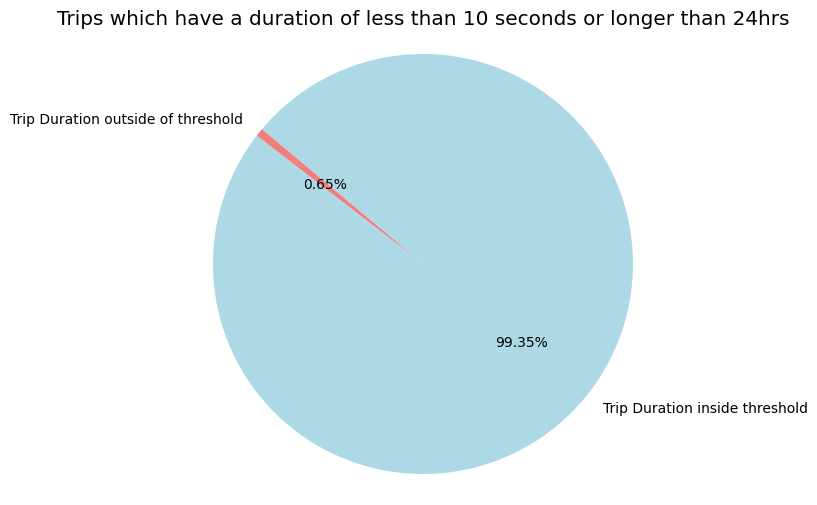

In [19]:
# Pie chart data
sizes = [len(df_thresh_duration), len(df)-len(df_thresh_duration)]
labels = ['Trip Duration outside of threshold', 'Trip Duration inside threshold']

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=140, colors = [ 'lightcoral','lightblue'])
plt.title('Trips which have a duration of less than 10 seconds or longer than 24hrs')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Show plot
plt.show()

<p style="font-size:18px;"> Due to the small percentage of values outside the realistic threshold these values were dropped. 

In [20]:
#Remove all the values which are outside the min and max threshold 
df = df[(df["trip_duration"] >= min_threshold) & (df["trip_duration"] <= max_threshold)]
print("Trip durations outside threshold have been removed.")

Trip durations outside threshold have been removed.


# **Data Analysis**
    
***

<p style="font-size:18px;">To begin my analysis it was important to see how many rows were relating to members and casual users. I then visualized the data using a pie chart. This tells me that the majority of the data is regarding members and 35.9% of the data is from casual users

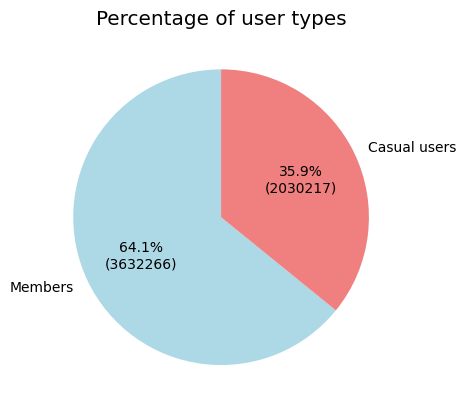

In [21]:
# Find the number of "members" and "casual" users
member_count = len(df[df['member_casual'] == 'member'])
casual_count = len(df[df['member_casual'] == 'casual'])

# Labels for the pie chart
labels = ['Members', 'Casual users']

# Data to plot
data = [member_count, casual_count]

# Colors for each section
colors = ['lightblue', 'lightcoral']

# Function to display both percentage and count
def values(pct, allvals):
    absolute = int(pct/100.*sum(allvals))
    return "{:.1f}%\n({:d})".format(pct, absolute)

# Plotting the pie chart
plt.pie(data, labels=labels, colors=colors, autopct=lambda pct: values(pct, data), startangle=90)

# Title of the pie chart
plt.title('Percentage of user types')

# Display the pie chart
plt.show()

<p style="font-size:18px;">I decided to look for diffrences between casual users and members I began by looking at a distribution between user types and the duration diffrent users use the bike sharing service. The graph below shows the percentage of trips for both members and casual users based on the duration of their trips. From this we can see that that casual users tend to use the bikes for a longer duration than members. It also shows that the majority of both members and casual users trips are shorter than 20 mins.

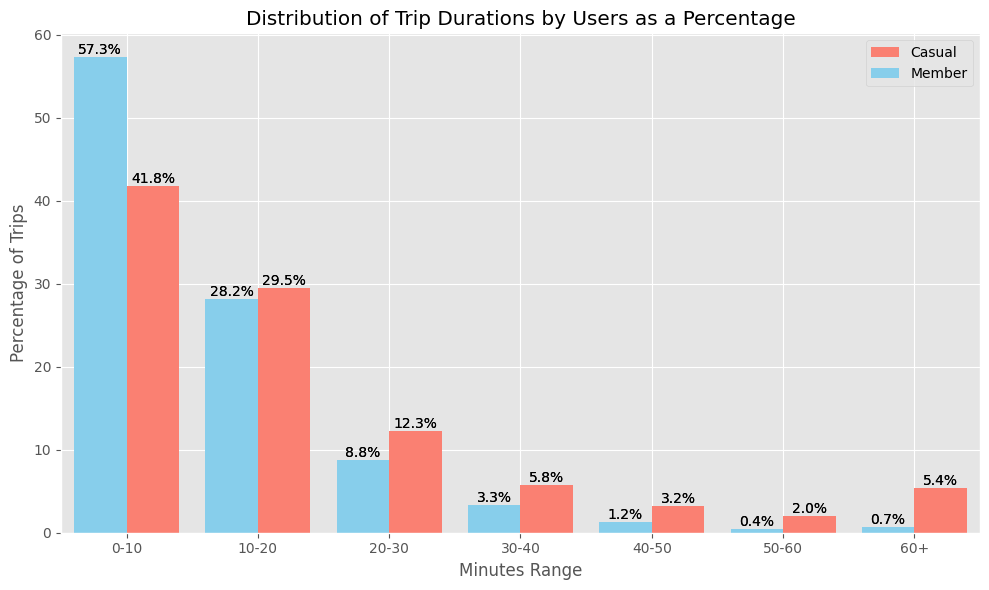

In [22]:
# Define the bins for grouping minutes
bins = [0, 10, 20, 30, 40, 50, 60, float('inf')]
labels = ['0-10', '10-20', '20-30', '30-40', '40-50', '50-60', '60+']

# Categorize the minutes into the specified ranges
df['trip_duration_range'] = pd.cut(df['trip_duration'], bins=bins, labels=labels, right=False)

# Count the total number of trips for normalization
total_trips = len(df)

# Count the total number of member and casual users
total_members = len(df[df['member_casual'] == 'member'])
total_casual = len(df[df['member_casual'] == 'casual'])

# Count the occurrences of each range for member and casual users separately
member_counts = df[df['member_casual'] == 'member']['trip_duration_range'].value_counts().reindex(labels, fill_value=0)
casual_counts = df[df['member_casual'] == 'casual']['trip_duration_range'].value_counts().reindex(labels, fill_value=0)

# Calculate the percentage of trips in each bin based on total member trips
member_percentages = (member_counts / total_members) * 100

# Calculate the percentage of trips in each bin based on total casual trips
casual_percentages = (casual_counts / total_casual) * 100

# Plotting
fig, ax = plt.subplots(figsize=(10, 6)) 

# Plot grouped bar chart for casual users
casual_bars = casual_percentages.plot(kind='bar', position=0, width=0.4, color='salmon', label='Casual', ax=ax)

# Plot grouped bar chart for member users
member_bars = member_percentages.plot(kind='bar', position=1, width=0.4, color='skyblue', label='Member', ax=ax)

# Add labels and title
plt.xlabel('Minutes Range')
plt.ylabel('Percentage of Trips')
plt.title('Distribution of Trip Durations by Users as a Percentage')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=0)

# Add legend
plt.legend()

# Set x-axis limits to include entire range
plt.xlim(-0.5, len(labels)-0.5)

# Annotate bars with percentage values
for bar in casual_bars.patches:
    ax.annotate(f'{bar.get_height():.1f}%', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

for bar in member_bars.patches:
    ax.annotate(f'{bar.get_height():.1f}%', 
                (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                ha='center', va='center', 
                xytext=(0, 5), 
                textcoords='offset points')

# Show plot
plt.tight_layout()
plt.show()

<p style="font-size:18px;"> The following graph plots the percentage of trips started per hour for both user types. From this graph it is clear to see that members are typically using the bikes in the morning between 7am-9am and in the afternoon/evening from 3pm-7pm. This could suggest that members are using the bikes to commute to and from work as the peak times align with rush hour times where there is likey to be an influx of traffic due to the begining and end of the typical work day. The casual users however show a more even distrubution of bike trips thoughout the day with a gradual increase from 5am to 5pm.

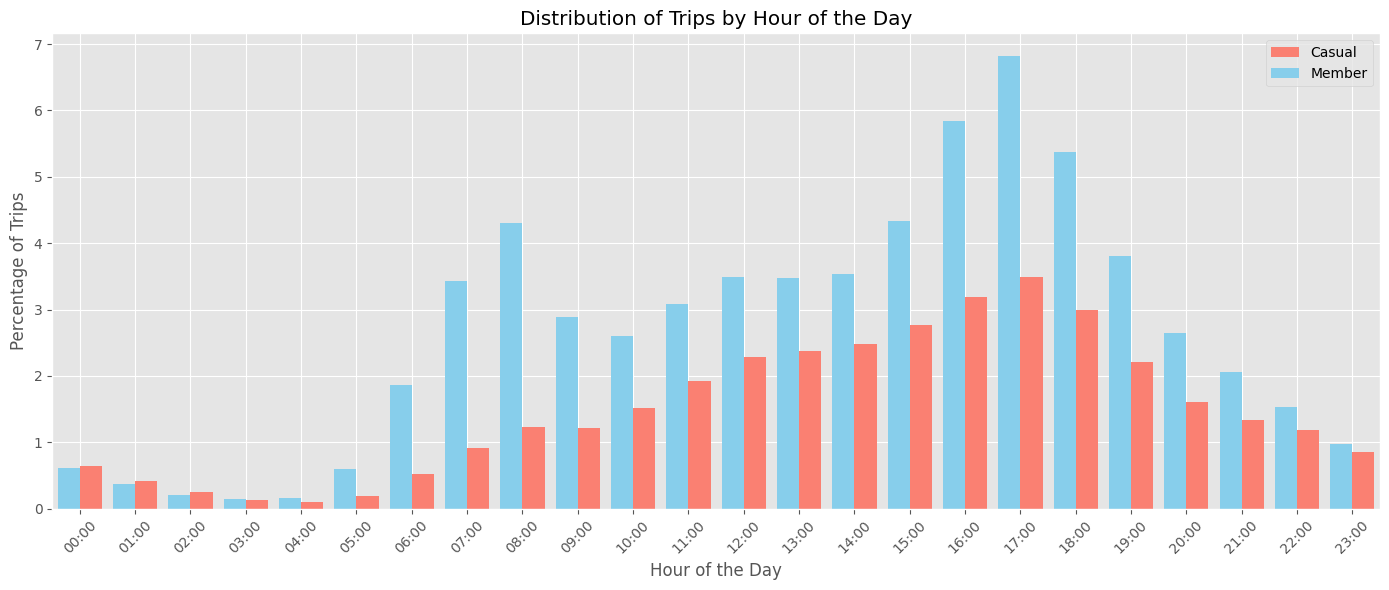

In [23]:
# Count the occurrences of each hour of the day for member and casual users separately
member_counts = df[df['member_casual'] == 'member']['hour_of_day'].value_counts().sort_index()
casual_counts = df[df['member_casual'] == 'casual']['hour_of_day'].value_counts().sort_index()

# Calculate the percentage of trips for each hour of the day
member_percentages = (member_counts / total_trips) * 100
casual_percentages = (casual_counts / total_trips) * 100

# Plotting
fig, ax = plt.subplots(figsize=(14, 6))

# Plot grouped bar chart for casual users
casual_bars = casual_percentages.plot(kind='bar', position=0, width=0.4, color='salmon', label='Casual', ax=ax)

# Plot grouped bar chart for member users
member_bars = member_percentages.plot(kind='bar', position=1, width=0.4, color='skyblue', label='Member', ax=ax)

# Add labels and title
plt.xlabel('Hour of the Day')
plt.ylabel('Percentage of Trips')
plt.title('Distribution of Trips by Hour of the Day')

# Set x-axis limits and labels
plt.xticks(range(24), [f'{i:02}:00' for i in range(24)], rotation=45)
plt.xlim(-0.5, 23.5)  # Set the x-axis limits to ensure the final bar is not cut off

# Add legend
plt.legend()

# Show plot
plt.tight_layout()
plt.show()

<p style="font-size:18px;"> To investigate this further I decided to plot the number of trips per user type by the day of the week each trip was started. The following graphs aligns with my previous hypothesis that members are more likely to be workers who use the bikes to commute to and from work. The graph shows that members use the bikes mostly on the weekdays with the weekends having the lowest number of rides. However the inverse is true for casual users as weekends have the highest numbers of trips and the weekdays have the lowest number of trips. This could suggest that casual users use the bikes for leisure or that casual users are potenially tourists/people visiting Chicago on a weekend. 

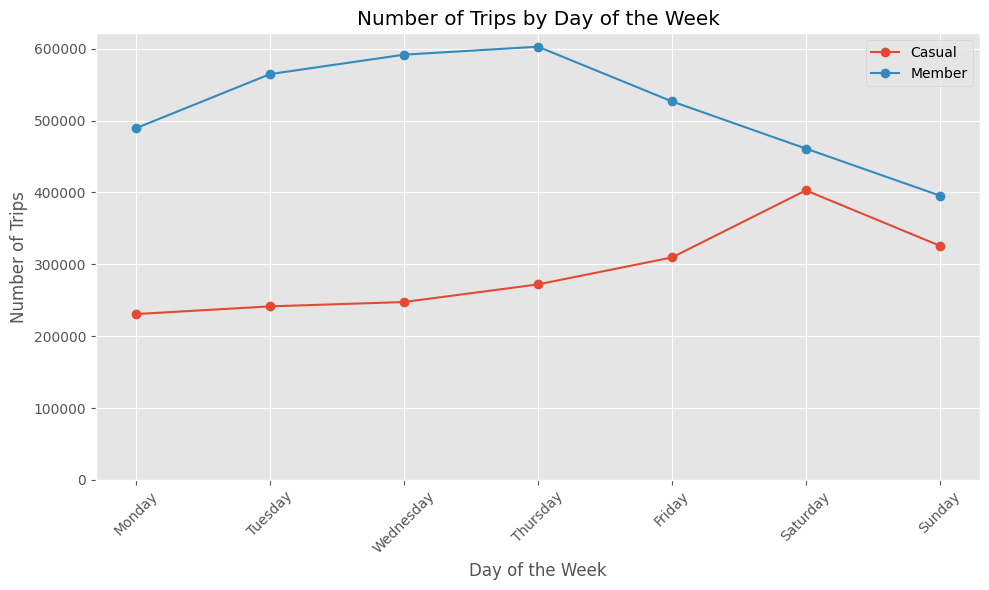

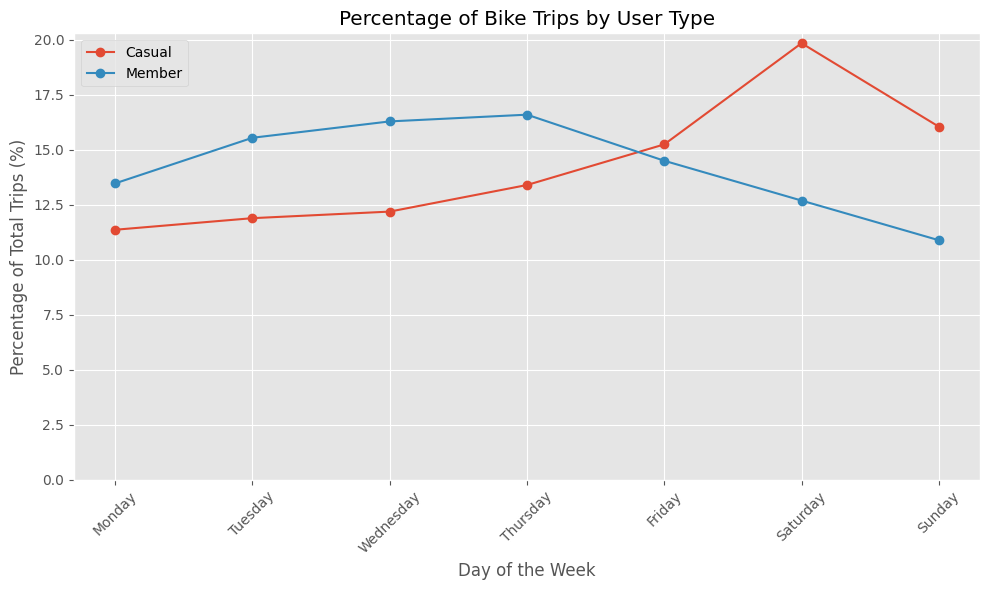

In [24]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

# Assuming df is your dataframe with a column named "day_of_week" and "member_casual"
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

# Counting the number of trips per day for members and casual users
member_trips_count_by_day = df[df['member_casual'] == 'member'].groupby('day_of_week', observed=False)['day_of_week'].count()
casual_trips_count_by_day = df[df['member_casual'] == 'casual'].groupby('day_of_week', observed=False)['day_of_week'].count()

# Merging the counts into a single dataframe
merged_df = pd.DataFrame({'member_trips_count': member_trips_count_by_day, 'casual_trips_count': casual_trips_count_by_day})

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df.index, merged_df['casual_trips_count'], marker='o', label='Casual')
plt.plot(merged_df.index, merged_df['member_trips_count'], marker='o', label='Member')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Day of the Week')
plt.xticks(rotation=45)
plt.ylim(0)  # Set y-axis to start at 0
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#################################################################################################################################################

#Plot percentage of trips per day of week for each user type
counts = df.groupby(['day_of_week', 'member_casual'], observed = False).size().reset_index(name='frequency')
total_trips_per_user_type = df['member_casual'].value_counts()
counts['percentage'] = counts.apply(lambda row: (row['frequency'] / total_trips_per_user_type[row['member_casual']]) * 100, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(counts[counts['member_casual'] == 'casual']['day_of_week'], counts[counts['member_casual'] == 'casual']['percentage'], marker='o', label='Casual')
plt.plot(counts[counts['member_casual'] == 'member']['day_of_week'], counts[counts['member_casual'] == 'member']['percentage'], marker='o', label='Member')
plt.title('Percentage of Bike Trips by User Type')
plt.xlabel('Day of the Week')
plt.ylabel('Percentage of Total Trips (%)')
plt.xticks(rotation=45)
plt.grid(True)
plt.ylim(0)  # Set lower limit of y-axis to 0
plt.tight_layout()
plt.legend()
plt.show()

<p style="font-size:18px;"> To dive deeper into this I wanted to see if there was a difference between average trip duration by day of the week for both user types. It appears that on average casual users use the bikes for a longer duration when compared to members. However, both user types showing an increase in average trip duration at the weekends. This could mean that on the weekends people are traveling longer distances or they are cycling slower/more leisurely as they could have more free time.

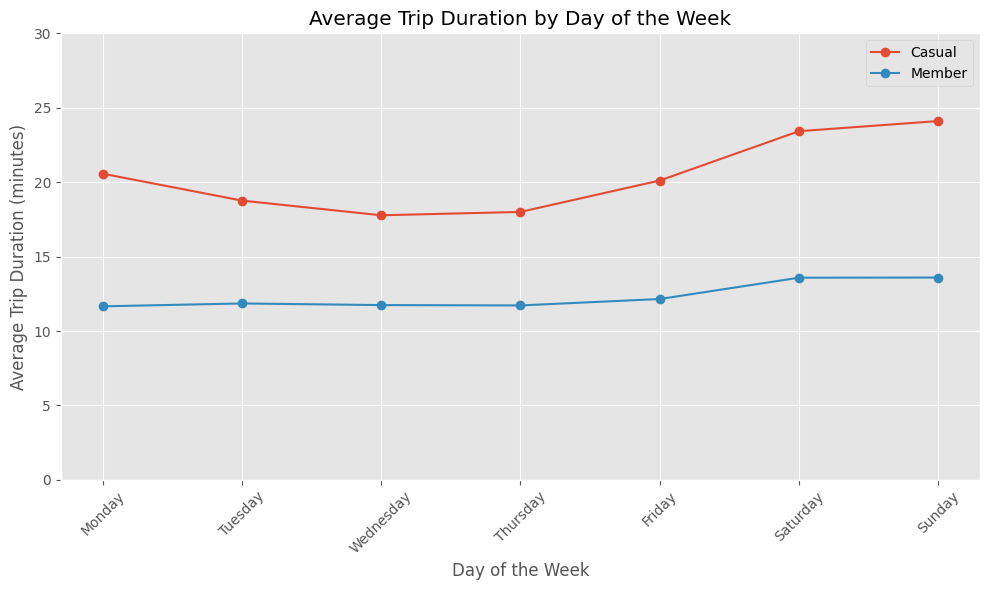

Average trip length for members in minutes
12.24
Average trip length for casual users in minutes
20.74


In [25]:
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
df['day_of_week'] = pd.Categorical(df['day_of_week'], categories=day_order, ordered=True)

member_trips = df[df['member_casual'] == 'member']
avg_member_trip_duration_by_day = member_trips.groupby('day_of_week', observed = False)['trip_duration'].mean()
avg_member_trip_duration_by_day

casual_trips = df[df['member_casual'] == 'casual']
avg_casual_trip_duration_by_day = casual_trips.groupby('day_of_week', observed = False)['trip_duration'].mean()
avg_casual_trip_duration_by_day


merged_df = pd.merge(avg_member_trip_duration_by_day, avg_casual_trip_duration_by_day, on='day_of_week', suffixes=('_member', '_casual'))
#merged_df

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df.index, merged_df['trip_duration_casual'], marker='o', label='Casual')
plt.plot(merged_df.index, merged_df['trip_duration_member'], marker='o', label='Member')
plt.xlabel('Day of the Week')
plt.ylabel('Average Trip Duration (minutes)')
plt.title('Average Trip Duration by Day of the Week')
plt.xticks(rotation=45)
plt.ylim(0, 30)
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


#Caclulate the average trip duration for both members and casual users
average_member_trip_duration = df[df['member_casual'] == 'member']['trip_duration'].mean()
average_casual_trip_duration = df[df['member_casual'] == 'casual']['trip_duration'].mean()


print("Average trip length for members in minutes")
print(round(average_member_trip_duration,2))
print("Average trip length for casual users in minutes")
print(round(average_casual_trip_duration,2))

<p style="font-size:18px;"> Now that there appears to be an inverse corelation between the user types and the day of the week the users are using the bikes. I wanted to see if there is a correlation between the user types and the months of the year the bikes are being used. The following graph plots the number of trips by month per each user type. The graph shows a strong correlation between the months of the year and the number of trips started between user types. The summer months being the months where the bikes are used the most and the winter months being the months which are used the least. This makes sense at it would correlate with the weather and temprature as most people would to want to cycle less in colder and wet or snowy conditions compared to warm sunny days.

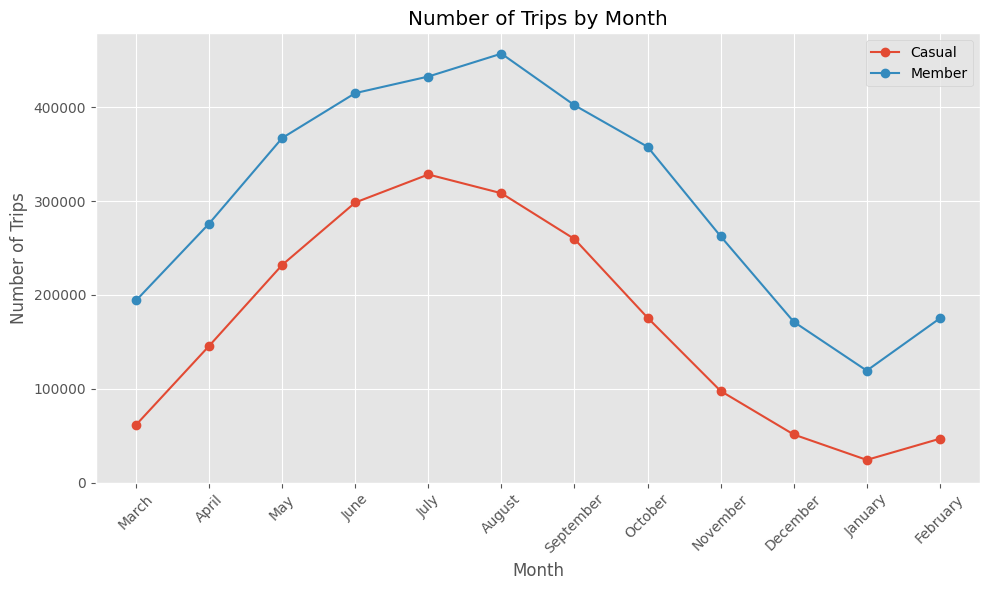

In [26]:
# Define custom order for months starting with March and ending with February
month_order = ['March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December', 'January', 'February']

# Set the month_of_year column as categorical with custom order
df['month_of_year'] = pd.Categorical(df['month_of_year'], categories=month_order, ordered=True)

# Counting the number of trips per month for members and casual users
member_trips_count_by_month = df[df['member_casual'] == 'member'].groupby('month_of_year', observed=False)['month_of_year'].count()
casual_trips_count_by_month = df[df['member_casual'] == 'casual'].groupby('month_of_year', observed=False)['month_of_year'].count()

# Merging the counts into a single dataframe
merged_df = pd.DataFrame({'member_trips_count': member_trips_count_by_month, 'casual_trips_count': casual_trips_count_by_month})

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(merged_df.index, merged_df['casual_trips_count'], marker='o', label='Casual')
plt.plot(merged_df.index, merged_df['member_trips_count'], marker='o', label='Member')
plt.xlabel('Month')
plt.ylabel('Number of Trips')
plt.title('Number of Trips by Month')
plt.xticks(rotation=45)
plt.ylim(0)  # Set y-axis to start at 0
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

<p style="font-size:18px;"> Now that the data shows the diffrence between user types per day of the week and month of the year. I wanted to see where the most popular stations are locatated and whether this could provide insight into how the diffrent user types use the bikes diffrently. To begin I grouped all start and end station names into a dataframe which counts the number of times each station appears in the data. The total times a station is started or ended at calculated into the column "total count" to give me a single metric to measure the popularity of each station. This new dataframe is then sorted by "total count" in descending order such that the most popular stations are at the top. 

In [27]:
# Combine start and end station counts
start_station_counts = df.groupby('start_station_name').size()
end_station_counts = df.groupby('end_station_name').size()

# Create a DataFrame to store the most popular stations for both start and end locations
top_stations_df = pd.DataFrame({
    'Station': start_station_counts.index,  # Use a generic column name for both start and end stations
    'Start Count': start_station_counts.values,
    'End Count': end_station_counts.reindex(start_station_counts.index, fill_value=0).values
})

# Calculate the total count (start + end) and sort the DataFrame by it in descending order
top_stations_df['Total Count'] = top_stations_df['Start Count'] + top_stations_df['End Count']
top_stations_df = top_stations_df.sort_values(by='Total Count', ascending=False)

# Select the top 10 most popular stations
top_10_most_popular_stations = top_stations_df.head(10)

# Include station longitude and latitude from the columns "start_lat" and "start_lng"
top_10_most_popular_stations_with_location = top_10_most_popular_stations.merge(df[['start_station_name', 'start_lat', 'start_lng']].drop_duplicates(subset=['start_station_name']), left_on='Station', right_on='start_station_name')

# Drop the unnecessary column "start_station_name"
top_10_most_popular_stations_with_location = top_10_most_popular_stations_with_location.drop(columns=['start_station_name'])
top_10_most_popular_stations_with_location = top_10_most_popular_stations_with_location.rename(columns={'start_lat': 'latitude', 'start_lng': 'longitude'})

top_10_most_popular_stations_with_location

,Station,Start Count,End Count,Total Count,latitude,longitude
0,Streeter Dr & Grand Ave,62758,63971,126729,41.892278,-87.612043
1,DuSable Lake Shore Dr & Monroe St,40098,38015,78113,41.880958,-87.616743
2,DuSable Lake Shore Dr & North Blvd,35848,39313,75161,41.911714,-87.626782
3,Michigan Ave & Oak St,37219,37873,75092,41.900960,-87.623777
4,Clark St & Elm St,35350,34587,69937,41.902973,-87.631280
5,Kingsbury St & Kinzie St,35075,34417,69492,41.889177,-87.638506
6,Wells St & Concord Ln,33078,33663,66741,41.912133,-87.634656
7,Clinton St & Washington Blvd,32975,33722,66697,41.883286,-87.641089
8,Theater on the Lake,30014,30595,60609,41.926277,-87.630834
9,Millennium Park,29800,30799,60599,41.881032,-87.624084


<p style="font-size:18px;"> From my newly created data frame I plotted the top 10 most popular stations on a map with the size of each marker being reflective of that stations popularity where the bigger the marker the more popular the station. This allowed me to see where the most popular stations are and if there could be any reason that these stations are the most popular. The map below shows that the top 10 stations are in key areas of the city such as major public transport stations as well as popular attractions like the public parks, beaches and the Navy Pier. This is a great insight however, this map does not show me the breakdown of the diffrent user types to allow me to see if there are any diffrences in where members and casual users are using the bikes.

In [28]:
# Create a Folium map centered around the mean latitude and longitude of the stations
map_center = [top_10_most_popular_stations_with_location['latitude'].mean(), top_10_most_popular_stations_with_location['longitude'].mean()]
top_stations = folium.Map(location=map_center, zoom_start=13)

# Add markers for the top 10 most popular stations
for index, row in top_10_most_popular_stations_with_location.iterrows():
    popup_text = f"{row['Station']} (Total Count: {row['Total Count']})"
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=row['Total Count']*0.00015,  # Adjust the size of the marker based on the Total Count
        popup=popup_text,
        fill=True,
        color='darkgreen',
        fill_opacity=0.6
    ).add_to(top_stations)

# Display the map
top_stations

<p style="font-size:18px;"> To visualize the top 10 stations by user type I created two new dataframes one for the 10 most popular member stations and another for the 10 most popular casual user stations. This would allow me to plot both the dataframes on a map to see if there were any geographic diffrences between how the user types are using the bikes.

In [29]:
def process_rides(df, user_type):
    # Filter the DataFrame where member_casual column matches the ride_type
    user_df = df[df['member_casual'] == user_type]

    # Combine start and end station counts for rides
    start_station_counts = user_df.groupby('start_station_name').size()
    end_station_counts = user_df.groupby('end_station_name').size()

    # Create a DataFrame to store the most popular stations for both start and end locations
    top_stations_df = pd.DataFrame({
        'Station': start_station_counts.index,  # Use a generic column name for both start and end stations
        'Start Count': start_station_counts.values,
        'End Count': end_station_counts.reindex(start_station_counts.index, fill_value=0).values
    })

    # Calculate the total count (start + end) and sort the DataFrame by it in descending order
    top_stations_df['Total Count'] = top_stations_df['Start Count'] + top_stations_df['End Count']
    top_stations_df = top_stations_df.sort_values(by='Total Count', ascending=False)

    # Select the top 10 most popular stations
    top_stations = top_stations_df.head(10)

    # Include station longitude and latitude from the columns "start_lat" and "start_lng"
    top_stations_with_location = top_stations.merge(
        df[['start_station_name', 'start_lat', 'start_lng']].drop_duplicates(subset=['start_station_name']),
        left_on='Station', right_on='start_station_name')

    # Drop the unnecessary column "start_station_name"
    top_stations_with_location = top_stations_with_location.drop(
        columns=['start_station_name'])
    top_stations_with_location = top_stations_with_location.rename(
        columns={'start_lat': 'latitude', 'start_lng': 'longitude'})

    return top_stations_with_location

# Process member rides
top_member_stations_with_location = process_rides(df, 'member')

# Process casual rides
top_casual_stations_with_location = process_rides(df, 'casual')

print("Top stations dataframes created")

Top stations dataframes created


In [30]:
# Define custom markers for legend
legend_html = """
<div style="position: fixed; bottom: 50px; left: 50px; z-index:9999; font-size:28px; background-color: black; color: white; padding: 10px; border-radius: 10px;">
    <p style="margin: 0;"><span style="background-color: blue; border-radius: 50%; display: inline-block; height: 10px; width: 10px; margin-right: 5px;"></span> Member Stations</p>
    <p style="margin: 0;"><span style="background-color: red; border-radius: 50%; display: inline-block; height: 10px; width: 10px; margin-right: 5px;"></span> Casual Stations</p>
</div>
"""

# Create the map
top_stations_map = folium.Map(location=map_center, zoom_start=13)

# Add legend to the map
top_stations_map.get_root().html.add_child(folium.Element(legend_html))

# Add markers for the top 10 most popular member stations
for index, row in top_member_stations_with_location.iterrows():
    popup_text = f"{row['Station']} (Total Count: {row['Total Count']})"
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        popup=popup_text,
        fill=True,
        color='blue',
        fill_opacity=0.6
    ).add_to(top_stations_map)

# Add markers for the top 10 most popular casual stations
for index, row in top_casual_stations_with_location.iterrows():
    popup_text = f"{row['Station']} (Total Count: {row['Total Count']})"
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        popup=popup_text,
        fill=True,
        color='red',
        fill_opacity=0.6
    ).add_to(top_stations_map)

# Display the map
top_stations_map

<p style="font-size:18px;"> Now that the 10 most popular stations per user type are plotted on the map there is a clear diffrence between how the users are using the bikes. It appears that my previous hypothesis could be correct as member appear to be using the bikes around major public transport stations. This suggests that the majority of members typically work monday to friday 9am-5pm and use the bikes to commute in and out of the city and additonally rely on public transport. Alternatively casual users seem to be using the bikes in key touristic and leisure areas of the city such as the public parks, beaches and Navy Pier. Further more this suggests that casual users are using the bikes for leisure and tourism and may only use the bikes for a short time period period of time such as a weekend or weeks holiday. As such casual users may feel a membership does not meet their needs.

# **Summary**
    
***

<p style="font-size:18px;">Throughout this case study a lot of information and insights have been uncovered from the orignal dataset. I feel now I can confidently answer Moreno's question and identify the diffrences between the user types and how the user types use the bikes diffrently.

<p style="font-size:18px;">Before I make any suggestions to improve conversion rate from casual user to membership I feel it is important to recap on the story the data is telling.

<p style="font-size:18px;">First of all we shall look at how members use the bike sharing service the data shows that: 
    
<ul> <li style="font-size:18px;">Members use the bikes the most on weekdays with weekends having less trips taken.
    
<li style="font-size:18px;">Members are most likely to start a trip around peak travel times/rush hour. which is between 6am-9am and 3pm-7pm.
    
<li style="font-size:18px;">Members favor short trips with almost 60% of member trips lasting less than 10 minutes.
    
<li style="font-size:18px;">Members most popular stations are near major public transport stations and surrounding the business district.</ul>

<p style="font-size:18px;">On the other hand the data shows that casual users:
    
<ul> <li style="font-size:18px;">Use the bikes the most on the weekends with weekdays having less trips taken.
    
<li style="font-size:18px;">Have a gradual increase in bike usage throughout the day with a peak usage time of 5pm
    
<li style="font-size:18px;">Tend to favor longer trips (when compared to member) having an average trip duration of 20.74 minutes.
    
<li style="font-size:18px;">Most popular stations are near public parks, beaches and touristic areas like the Navy Pier.</ul>


<p style="font-size:18px;"> From the data I can confidently say there is a significant diffrence between how the user types use the bikes diffrently. It appears that casual users are likely to be people who use the bike service for leisure and tourism rather than using the bikes to commute. From the story the data has told I would make the following recommendations to improve the conversion rate from casual users to members:
    
<p style="font-size:18px;"><strong>Weekend memberships:</strong> Offer short term weekend memberships or passes which appeal to the casual users who primarily use the bike service at weekends. This type of membership would be great for people visiting Chicago for short weekend trips. The weekend memberships would be priced cheaper than a typical membership but would be priced higher than a standard trip to incentivise the user to take multiple journeys across the weekend pass period. This gives the user the added benefit of cheaper rides the more they use the pass whilst also earning the company more revenue through the membership cost.   
    
<p style="font-size:18px;"><strong>Short term memberships:</strong> a very similar recommendation to the "weekend memberships" but instead to limit short term memberships to only weekends, offer short term memberships of say 3 days, 7 days and 14 days. This would give casual users much greater flexabilty in their membership options depending on the duration that user requires. This would also appeal to tourists or commuters who are only visiting Chicago for a short duration. The short term memberships would be priced cheaper than a typical months membership but would be priced higher than a standard trip to incentivise the user to take multiple journeys across the duration of the membership. This gives the user the added benefit of cheaper rides the more they use the pass whilst also earning the company more revenue through the membership cost.   
    
<p style="font-size:18px;"><strong>Membership Incentives:</strong> Offer incentives to make the memberships more appealing to casual users. The data shows that the most popular stations for casual users are surrounding popular tourist attractions. Cyclistic could partner with the most popular attractions to offer discounts to popular tourism attractions with a membership. For example with a membership you also save 10% or more on selected museums, zoos and attractions. This recommendation would be great for exisiting members as they get more value in their membership and fantastic for casual users. Anyone visiting Chicago who wants to view and experience the main attractions would benfift from this option as they get access to the bikes to travel around the city as well as discounts on the attractions they want to visit.
    


# **Conclusion**
    
***



<p style="font-size:18px;"> From the data I feel I have sucessfully been able to answer Moreno's question and provide business recommendations to improve the conversion rate from casual user to member. I hope this case study has provided useful insight to the data and how data can be used to make recommendations which can infulence a business' strategy. Feel free to provide feedback on my analysis I would love to hear your thoughts and opinions on the analysis. Many thanks for reading!